### Car Price Predictive Model using RFE  - Linear Regression Model

### Importing and Understanding Data

In [408]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [410]:
# Importing CarPrice_Assignment.csv
carprice = pd.read_csv('F:/CarPrice_Assignment.csv')
print("Dimension of the DataFrame:", '\n',carprice.shape,'\n')
print("Top 5 rows of the DataFrame:",'\n',carprice.head(),'\n')
carprice.info() # no null values observed

Dimension of the DataFrame: 
 (205, 26) 

Top 5 rows of the DataFrame: 
    car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase   ...     enginesize  \
0  convertible        rwd          front       88.6   ...            130   
1  convertible        rwd          front       88.6   ...            130   
2    hatchback        rwd          front       94.5   ...            152   
3        sedan        fwd          front       99.8   ...            109   
4        sedan        4wd          front       99.4   ...   

In [411]:
# let's check out the numeric variables
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [412]:
# Let's drop car_ID as it seems to be just the serial numnber
carprice = carprice.drop("car_ID", axis = 1)
carprice.shape

(205, 25)

In [413]:
# Variable CarName contains manufacture name + model name and it has too many unique values, won't be helpful for analysis
print("No. of Unique Values for CarName column:", '\n', len(carprice.CarName.unique()))

# Lets concentrate only on the manufacturer name as brand might have an impact on the price of the car.
# Add a new column "Brand"
carprice['Brand'] = carprice['CarName'].str.split(' ').str[0]
print('\n',"List of Unique Values for the newly added column Brand:", '\n', carprice.Brand.unique())

# Now we have a little over 20 values in the "Brand" column, but there seems to be some spelling issues:
# volkswagen, vokswagen & vw should be same
# porsche and porcshce should be same
# toyota & toyouta should be same
# maxda & mazda should be same
# Nissan & nissan should be same
# Lets correct these spellings
carprice['Brand'] = carprice['Brand'].replace(['vokswagen', 'vw'], 'volkswagen')
carprice['Brand'] = carprice['Brand'].replace(['toyouta'], 'toyota')
carprice['Brand'] = carprice['Brand'].replace(['porcshce'], 'porsche')
carprice['Brand'] = carprice['Brand'].replace(['Nissan'], 'nissan')
carprice['Brand'] = carprice['Brand'].replace(['maxda'], 'mazda')

# Check the updated dataframe:
print('\n',"Updated Unique Values for Brand:", '\n', carprice.Brand.unique())

# We can safely drop CarName column now as we have extracted the useful information from it
carprice = carprice.drop("CarName", axis = 1)

No. of Unique Values for CarName column: 
 147

 List of Unique Values for the newly added column Brand: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']

 Updated Unique Values for Brand: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [414]:
# Lets check other variables if there are any spelling mistakes
for i in carprice.columns:
    print(i,carprice[i].unique(),'\n')
    
# Few spelling mistakes have been observed, lets correct them
# drivewheel ['rwd' 'fwd' '4wd'] has spelling issue, need correction 
carprice['drivewheel'] = carprice['drivewheel'].replace(['rwd', '4wd'], 'fwd')

# lets convert cylindernumber ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] to numeric values
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['two'], 2)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['three'], 3)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['four'], 4)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['five'], 5)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['six'], 6)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['eight'], 8)
carprice['cylindernumber'] = carprice['cylindernumber'].replace(['twelve'], 12)

# Lets convert doornumber ['two' 'four'] to numeric values
carprice['doornumber'] = carprice['doornumber'].replace(['two'], 2)
carprice['doornumber'] = carprice['doornumber'].replace(['four'], 4)

symboling [ 3  1  2  0 -1 -2] 

fueltype ['gas' 'diesel'] 

aspiration ['std' 'turbo'] 

doornumber ['two' 'four'] 

carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drivewheel ['rwd' 'fwd' '4wd'] 

enginelocation ['front' 'rear'] 

wheelbase [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 

carlength [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.

In [415]:
# Lets check the updated dataframe
print('\nUpdated DataFrame:')
for i in carprice.columns:
    print(i,carprice[i].unique(),'\n')


Updated DataFrame:
symboling [ 3  1  2  0 -1 -2] 

fueltype ['gas' 'diesel'] 

aspiration ['std' 'turbo'] 

doornumber [2 4] 

carbody ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] 

drivewheel ['fwd'] 

enginelocation ['front' 'rear'] 

wheelbase [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 

carlength [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6

<Figure size 2000x1200 with 0 Axes>

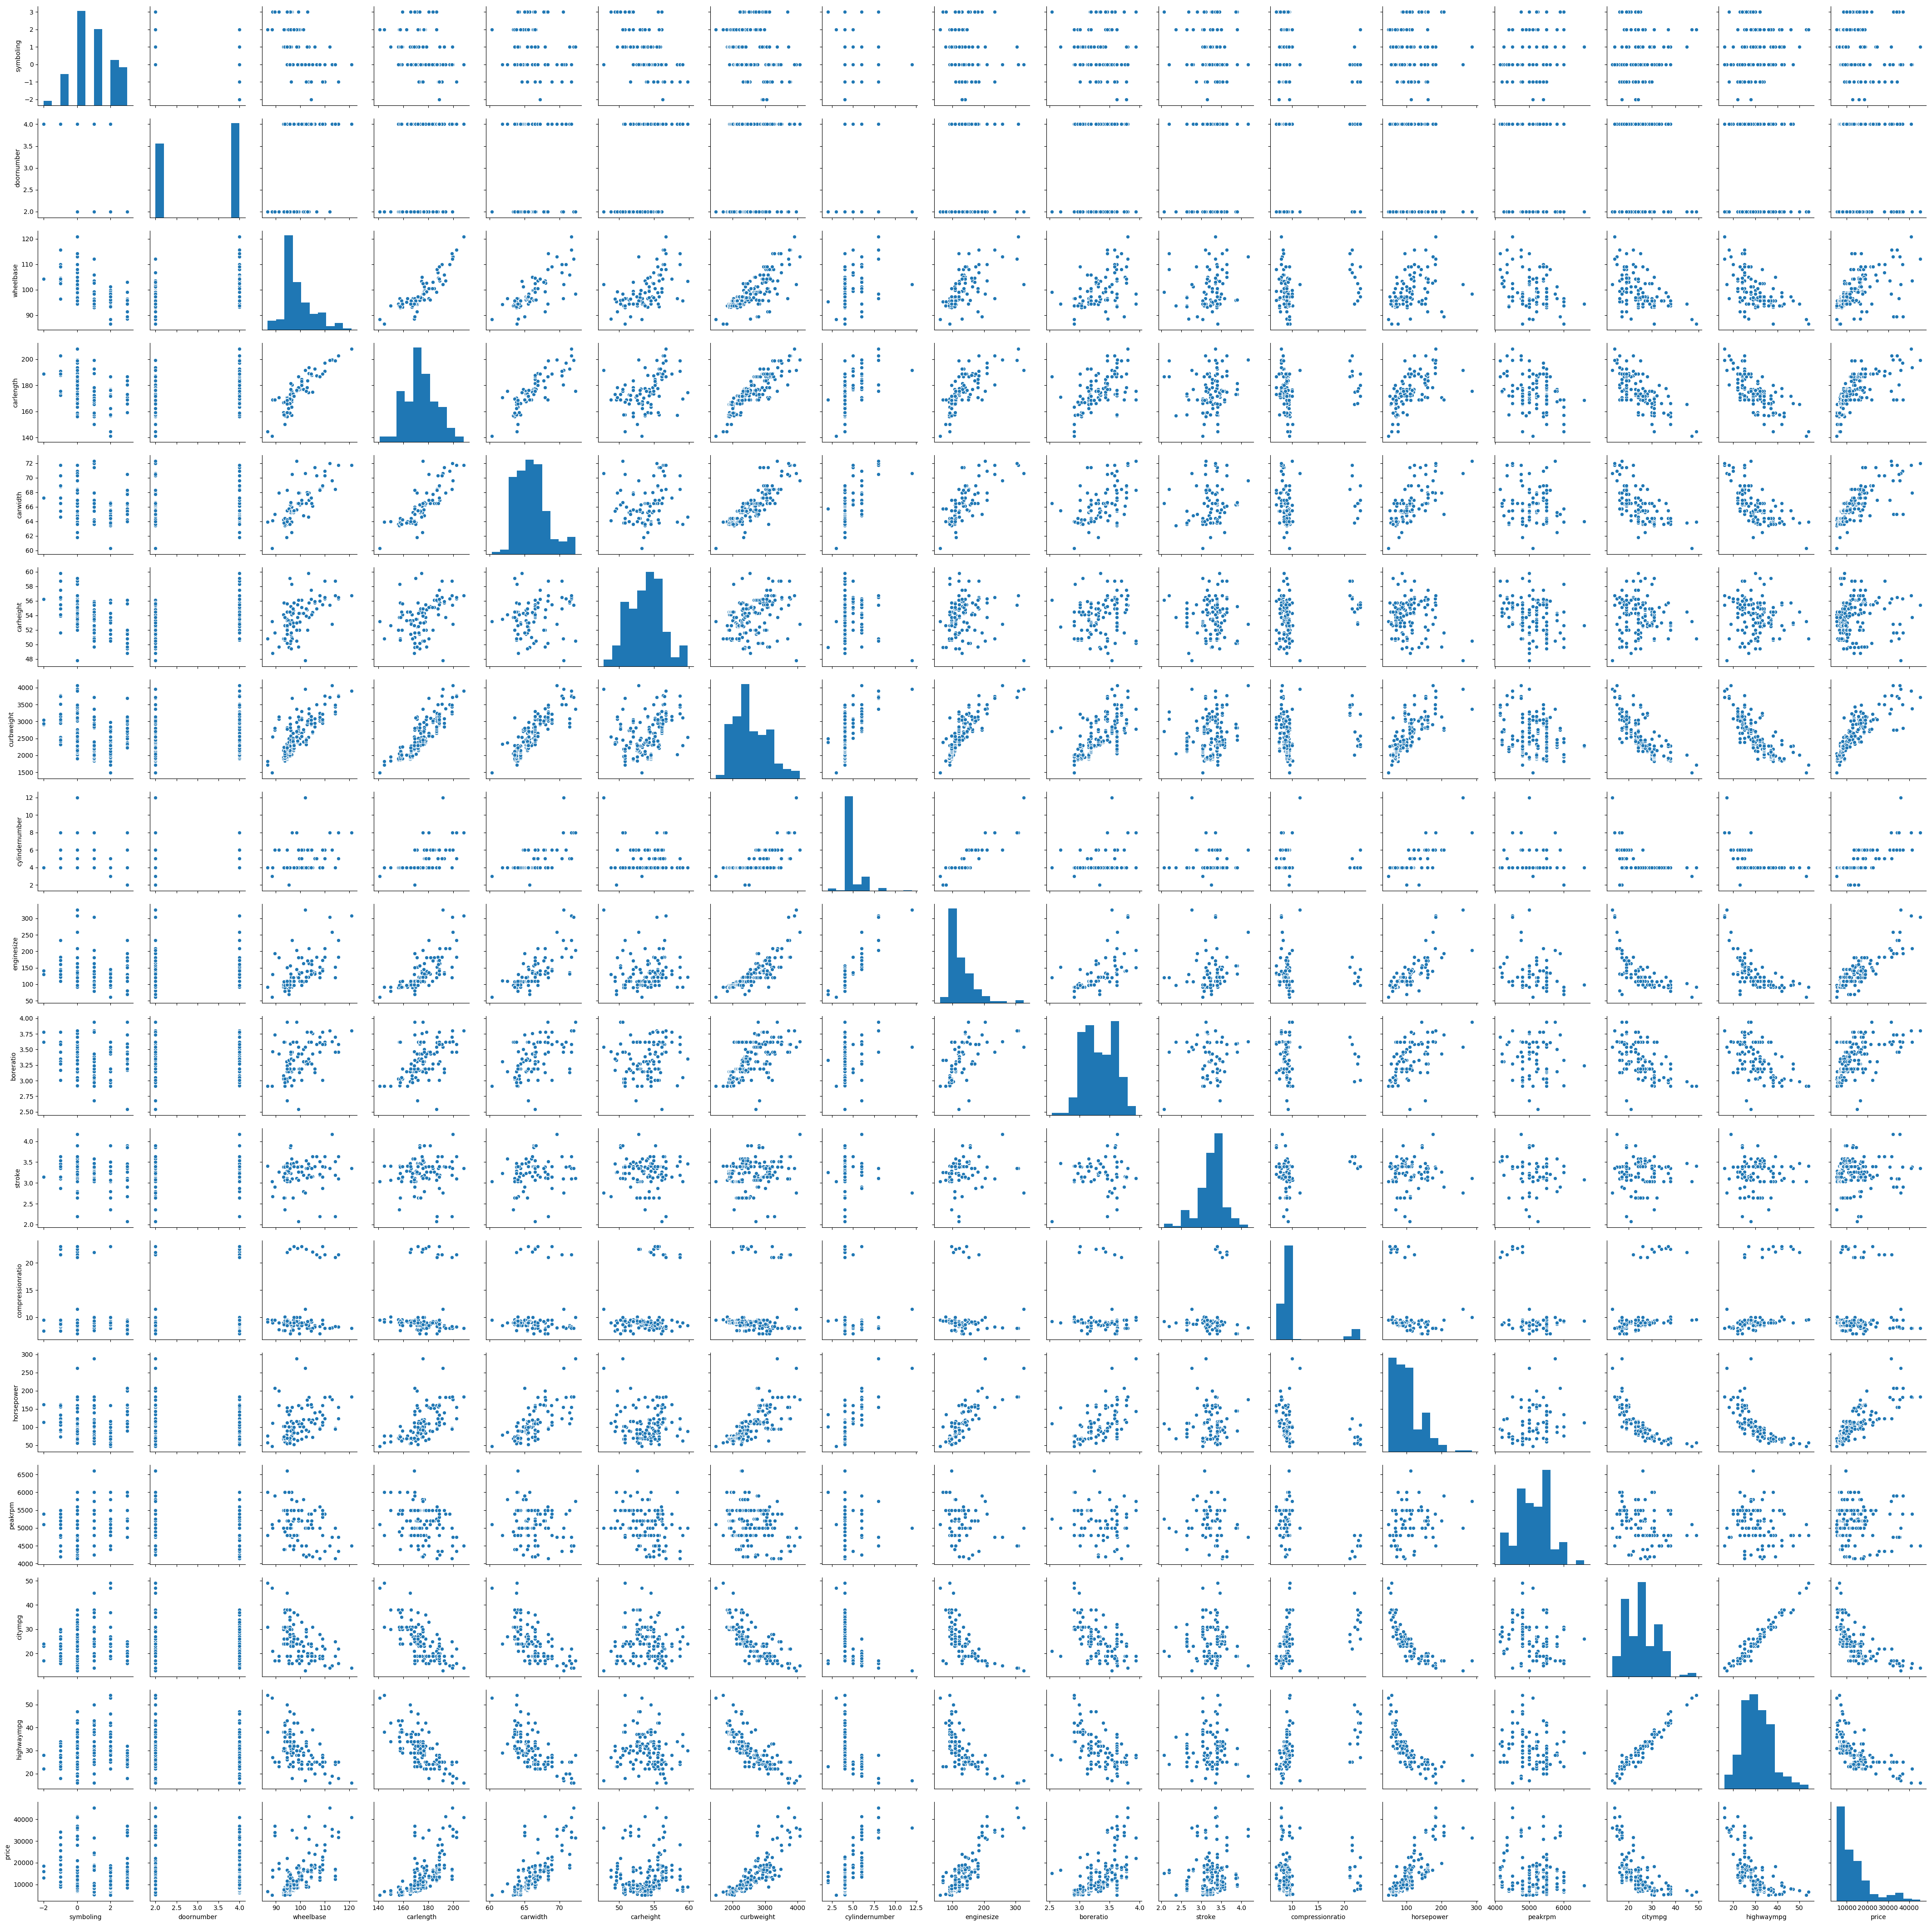

In [416]:
# Lets create pairplot between all the variables
plt.figure(figsize=(20, 12))
sns.pairplot(carprice)
plt.show()

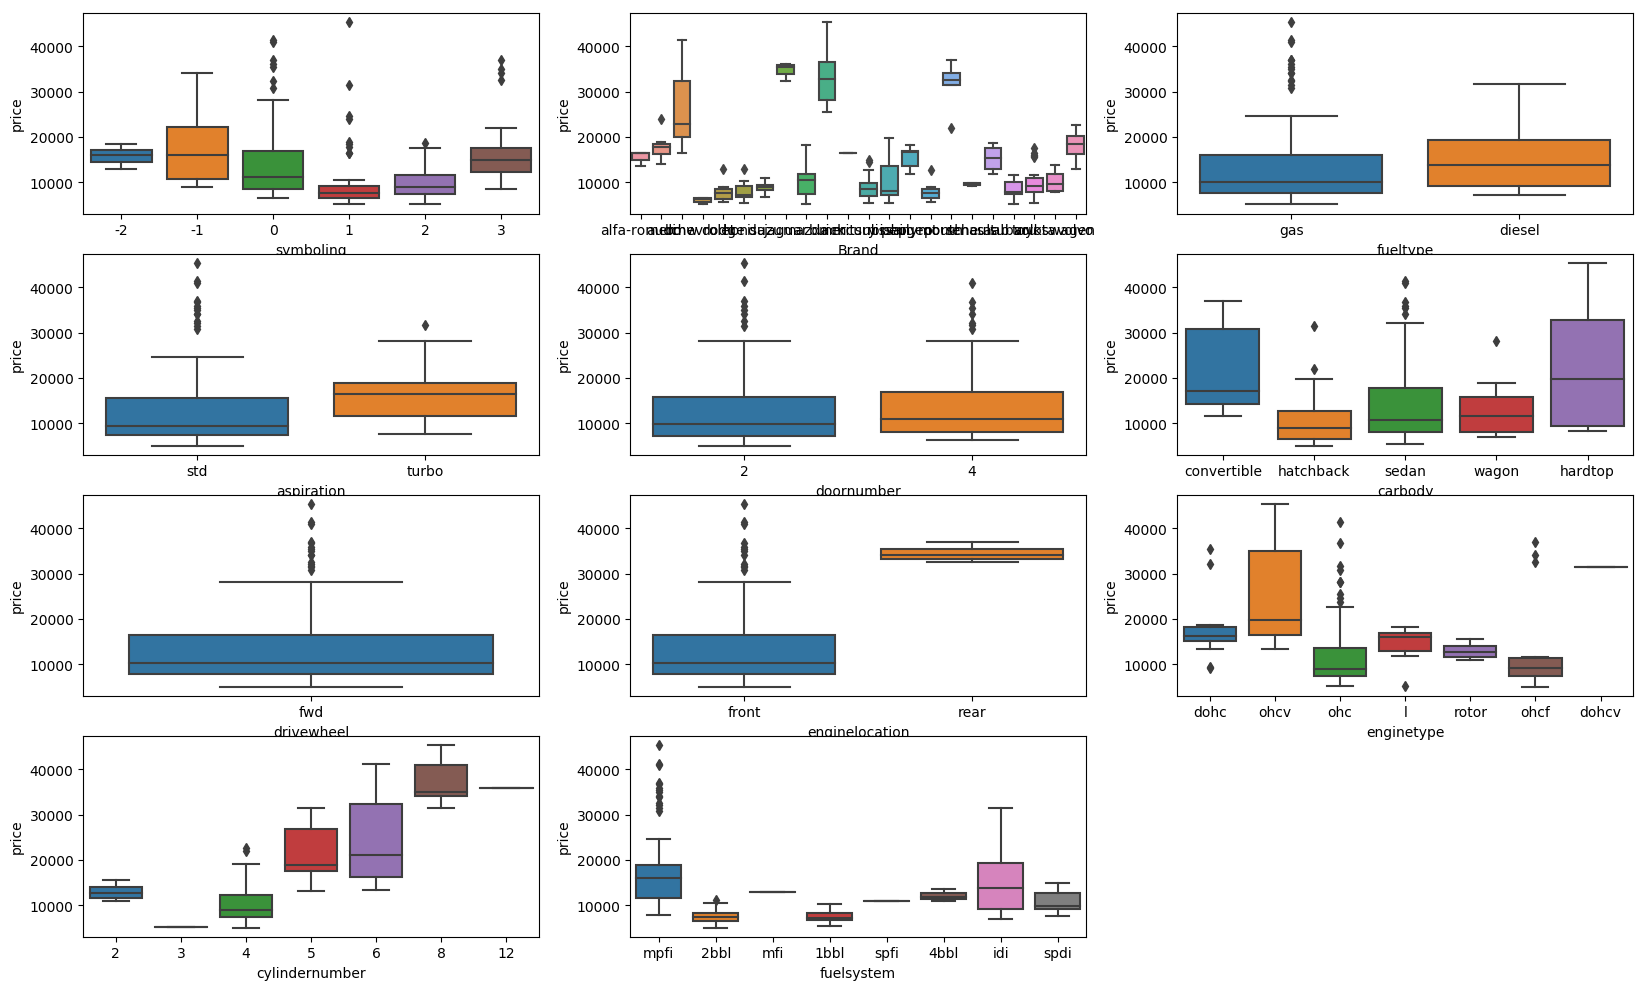

In [417]:
# Let's make a boxplot for categorical variables.
plt.figure(figsize=(20, 12))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'Brand', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

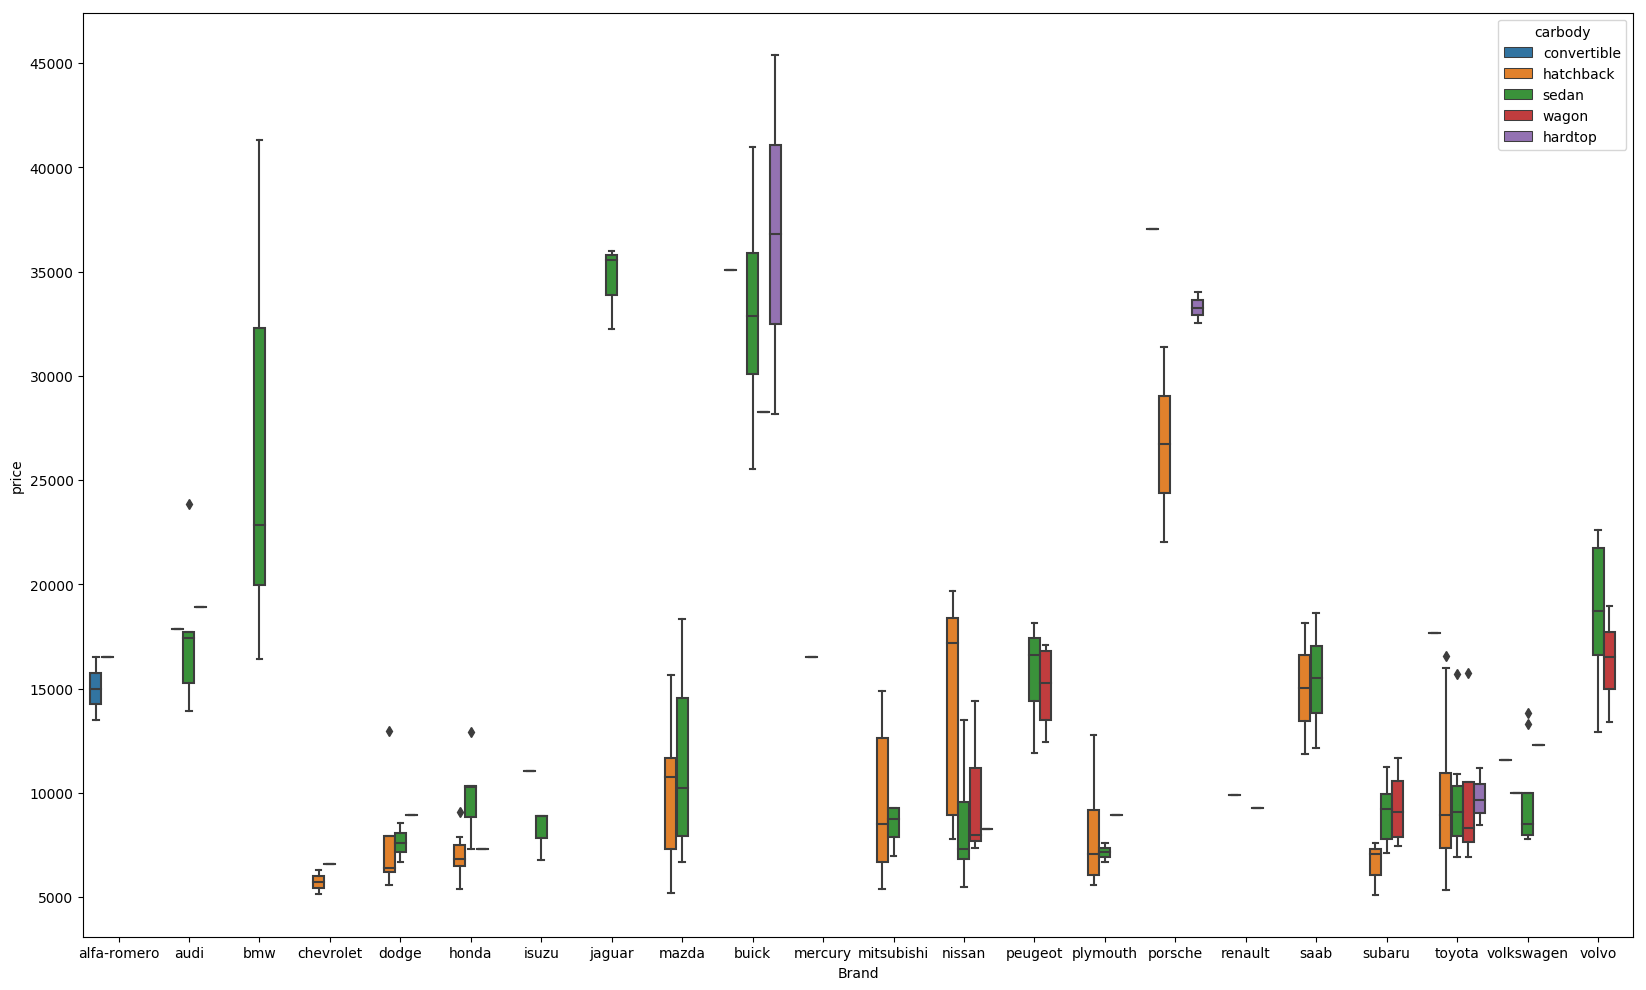

In [418]:
# Box plot for Brand & Carbody against price
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Brand', y = 'price',hue= 'carbody' ,data = carprice)
plt.show()

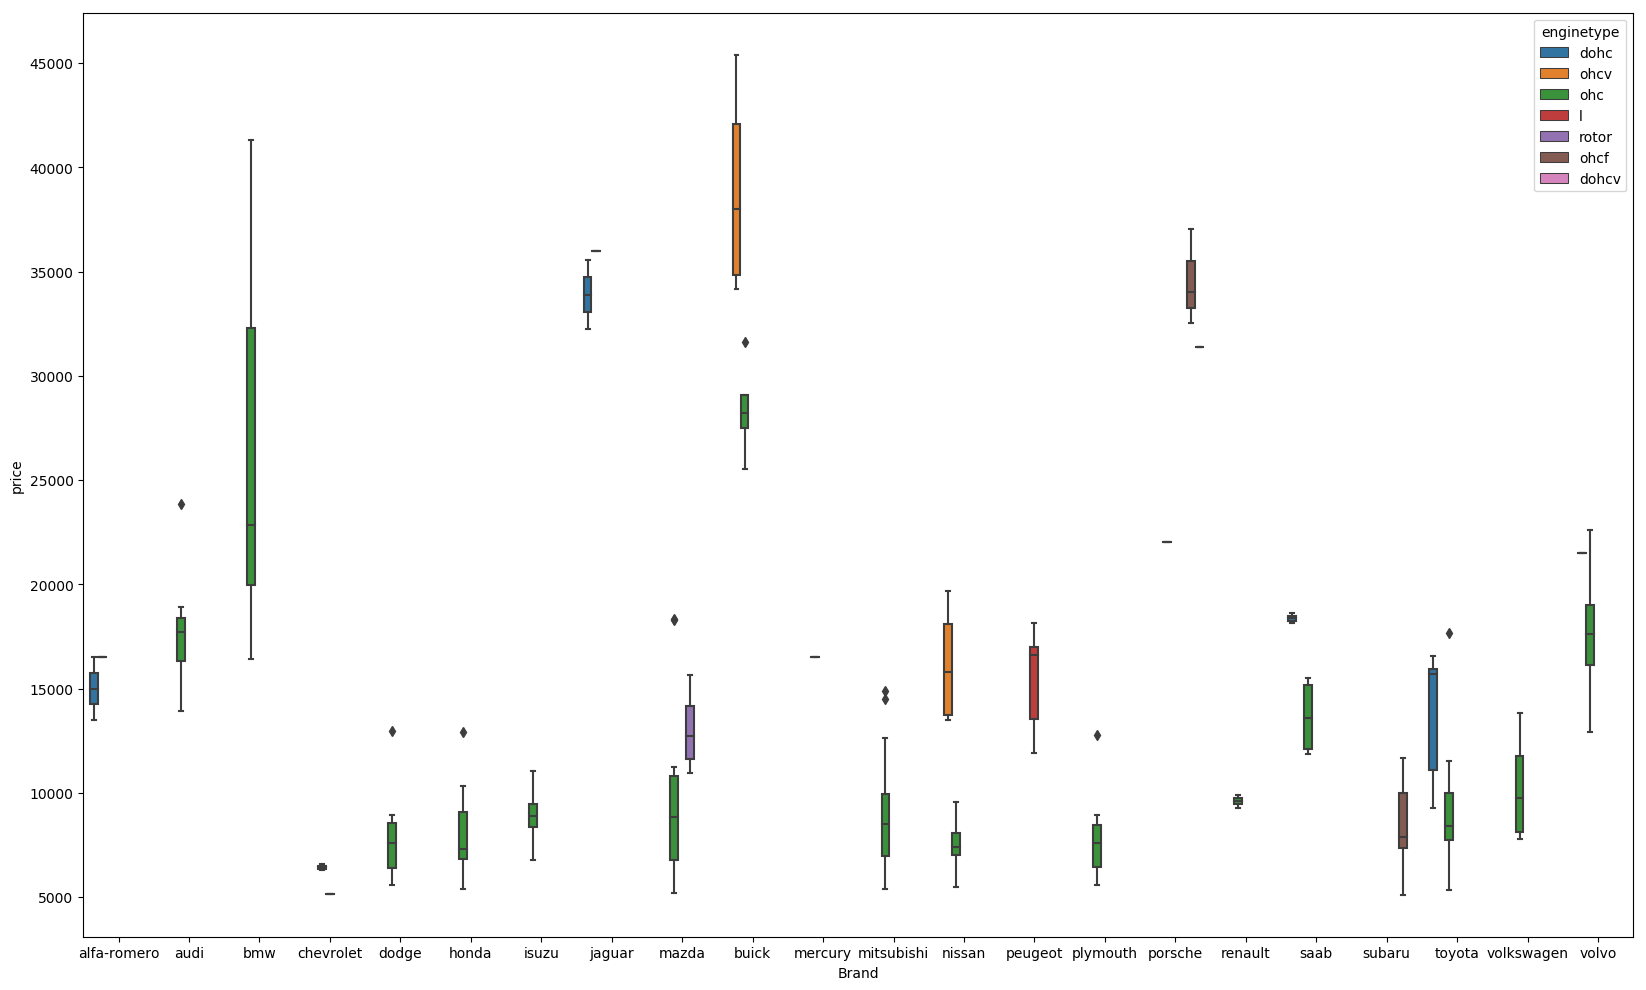

In [419]:
# Boxplot for Brand & enginetype agains price
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Brand', y = 'price',hue= 'enginetype' ,data = carprice)
plt.show()

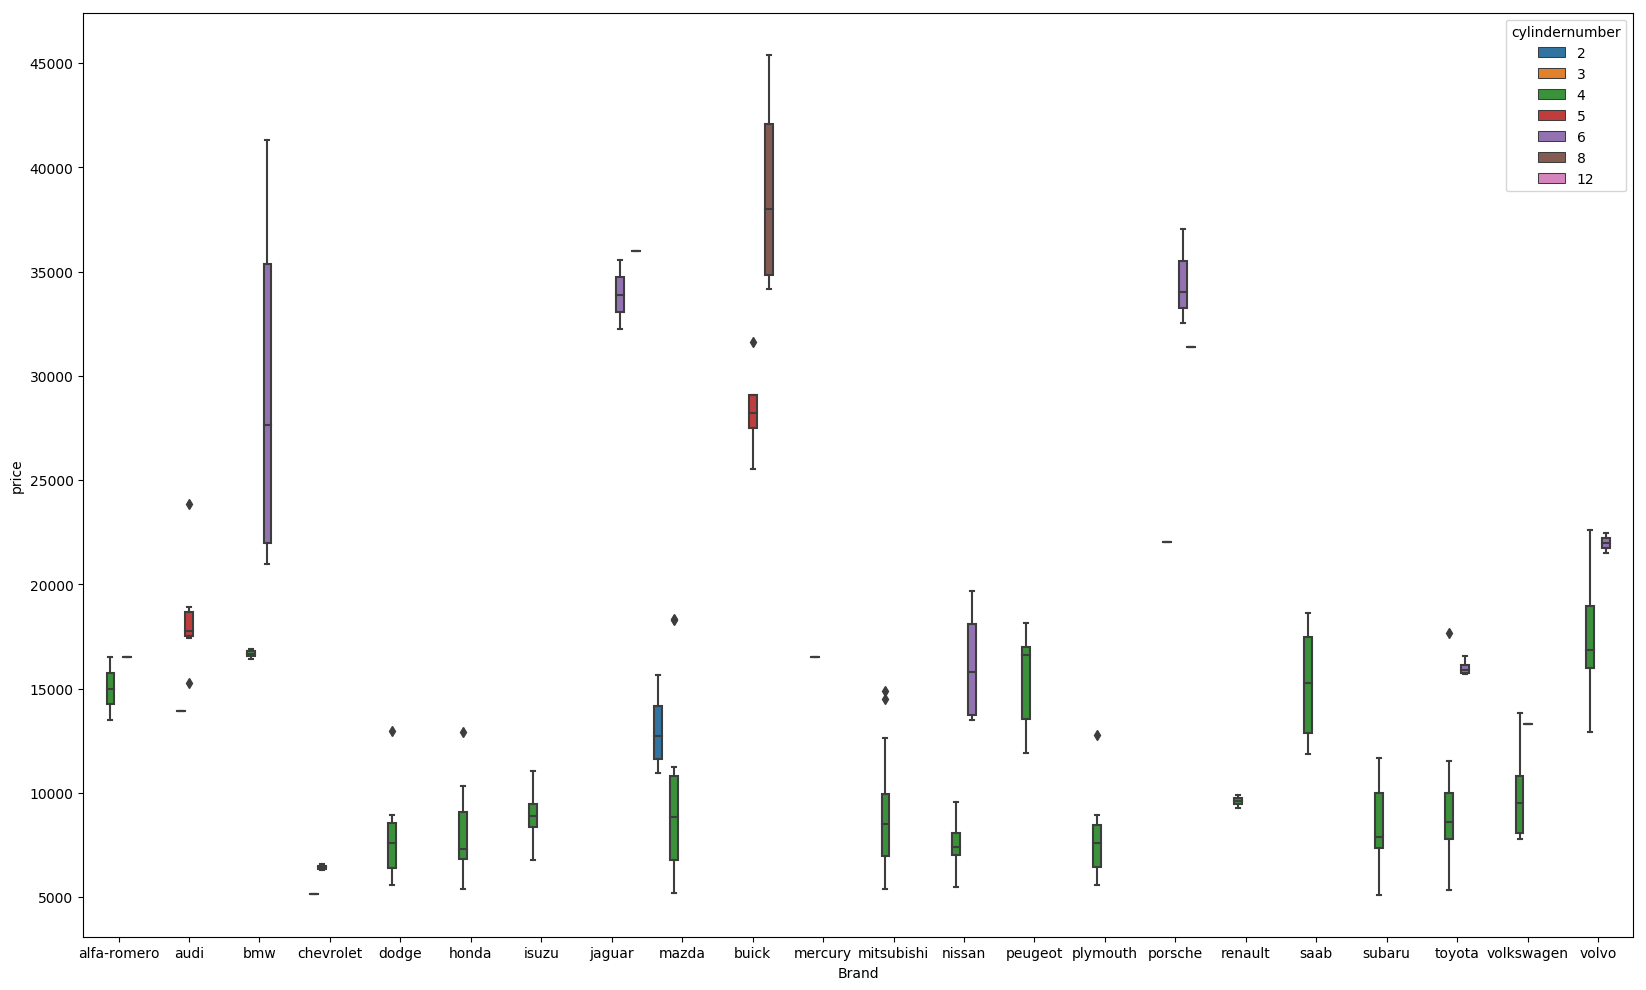

In [420]:
# Boxplot for Brand & cylindernumber against price
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'Brand', y = 'price',hue= 'cylindernumber' ,data = carprice)
plt.show()

### Dummy Variables

We need to create dummy variables for the categorical columns, lets do it

In [421]:
Brand = pd.get_dummies(carprice['Brand'],drop_first = True)
carprice = pd.concat([carprice, Brand], axis = 1)
carprice = carprice.drop('Brand',axis=1)
carprice.head()

fueltype = pd.get_dummies(carprice['fueltype'],drop_first = True)
fueltype.head()
carprice = pd.concat([carprice, fueltype], axis = 1)
carprice = carprice.drop('fueltype',axis=1)
carprice.head()

aspiration = pd.get_dummies(carprice['aspiration'],drop_first = True)
aspiration.head()
carprice = pd.concat([carprice, aspiration], axis = 1)
carprice = carprice.drop('aspiration',axis=1)
carprice.head()

carbody = pd.get_dummies(carprice['carbody'],drop_first = True)
carprice = pd.concat([carprice, carbody], axis = 1)
carprice = carprice.drop('carbody',axis=1)
carprice.head()

drivewheel = pd.get_dummies(carprice['drivewheel'],drop_first = True)
carprice = pd.concat([carprice, drivewheel], axis = 1)
carprice = carprice.drop('drivewheel',axis=1)
carprice.head()

enginelocation = pd.get_dummies(carprice['enginelocation'],drop_first = True)
carprice = pd.concat([carprice, enginelocation], axis = 1)
carprice = carprice.drop('enginelocation',axis=1)
carprice.head()

enginetype = pd.get_dummies(carprice['enginetype'],drop_first = True)
carprice = pd.concat([carprice, enginetype], axis = 1)
carprice = carprice.drop('enginetype',axis=1)
carprice.head()

fuelsystem = pd.get_dummies(carprice['fuelsystem'],drop_first = True)
carprice = pd.concat([carprice, fuelsystem], axis = 1)
carprice = carprice.drop('fuelsystem',axis=1)
carprice.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [422]:
# Lets check the updated dataframe
print('\nUpdated DataFrame with dummy variable:')
for i in carprice.columns:
    print(i,carprice[i].unique(),'\n')


Updated DataFrame with dummy variable:
symboling [ 3  1  2  0 -1 -2] 

doornumber [2 4] 

wheelbase [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.2 100.4  91.3  99.2
 107.9 114.2 108.   89.5  98.4  96.1  99.1  93.3  97.   96.9  95.7 102.4
 102.9 104.5  97.3 104.3 109.1] 

carlength [168.8 171.2 176.6 177.3 192.7 178.2 176.8 189.  193.8 197.  141.1 155.9
 158.8 157.3 174.6 173.2 144.6 150.  163.4 157.1 167.5 175.4 169.1 170.7
 172.6 199.6 191.7 159.1 166.8 169.  177.8 175.  190.9 187.5 202.6 180.3
 208.1 199.2 178.4 173.  172.4 165.3 170.2 165.6 162.4 173.4 181.7 184.6
 178.5 186.7 198.9 167.3 168.9 175.7 181.5 186.6 156.9 157.9 172.  173.5
 173.6 158.7 169.7 166.3 168.7 176.2 175.6 183.5 187.8 171.7 159.3 165.7
 180.2 183.1 188.8] 

carwidth [64.1 65.5 66.2 66.4 66.3 71.4 67.9 64.8 66.9 70.9 60.3 63.6 63.8 64.6
 63.9 64.  65.2 62.5 66

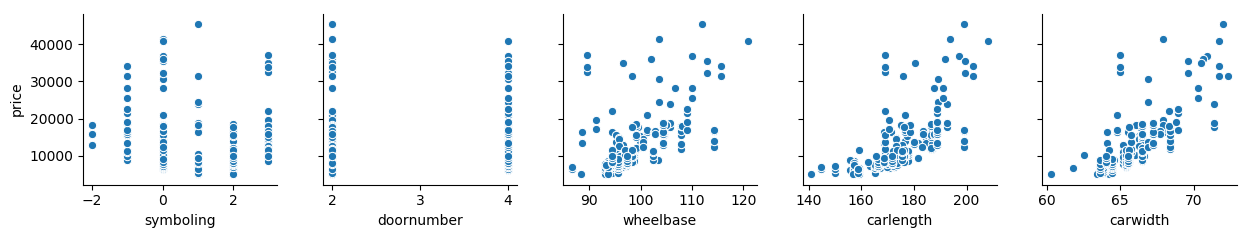

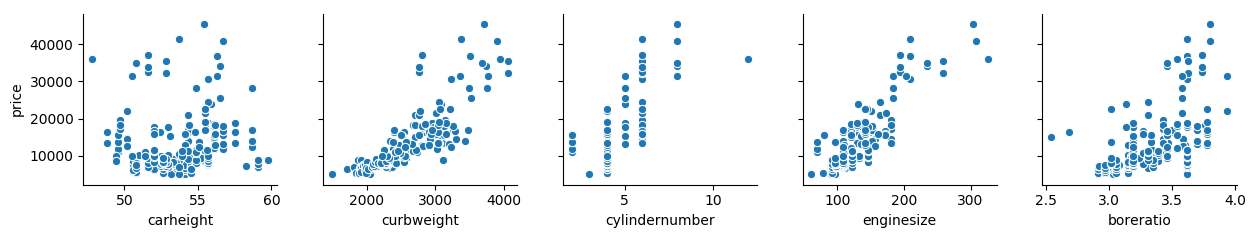

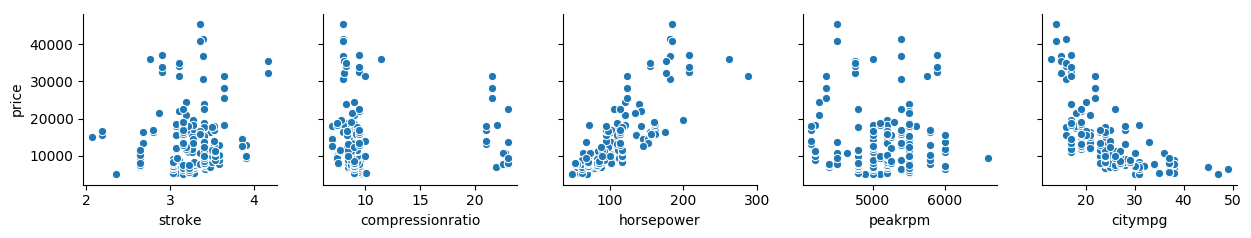

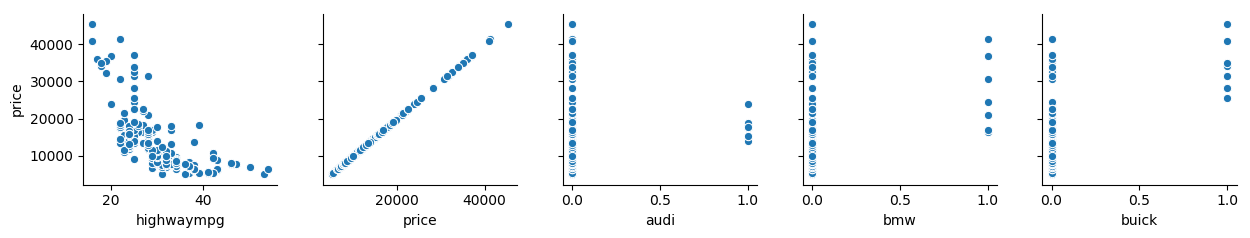

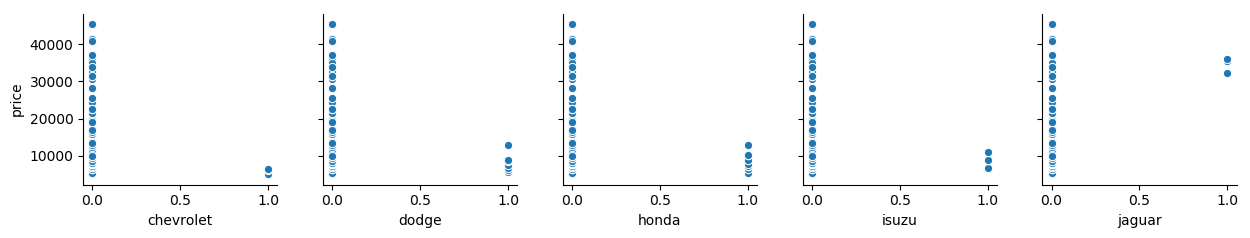

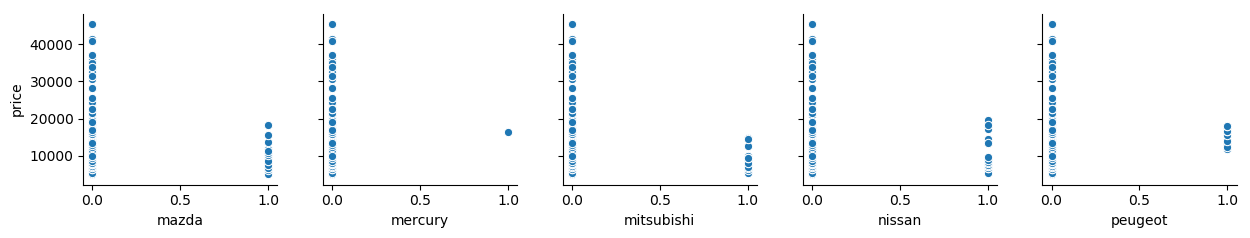

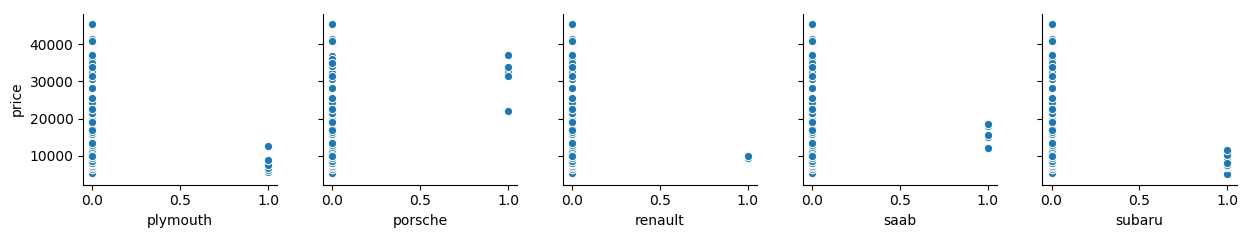

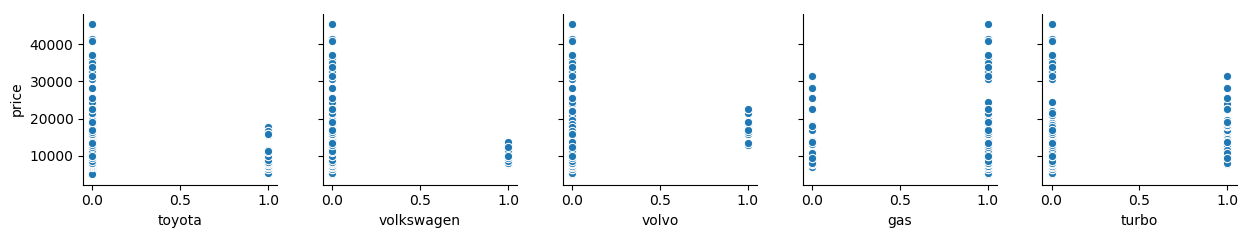

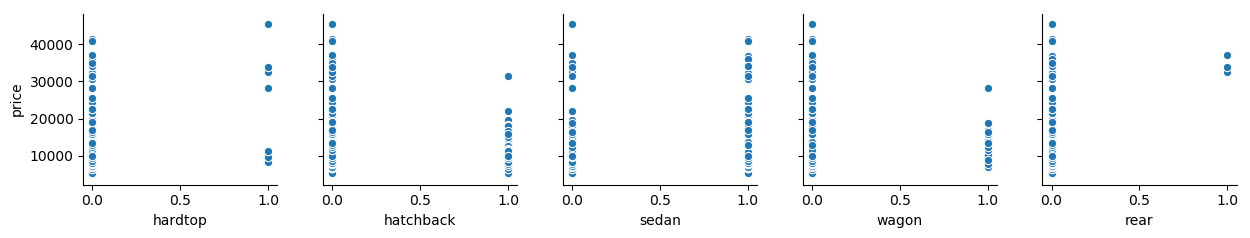

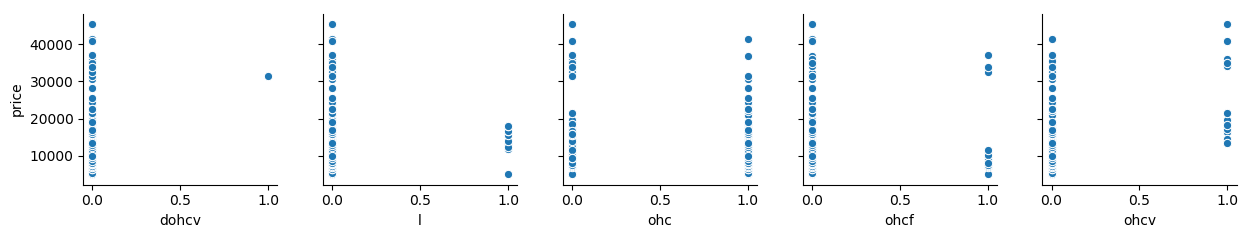

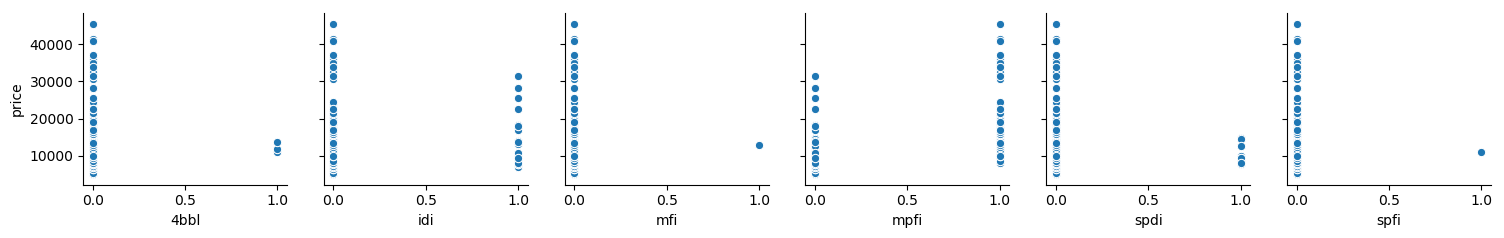

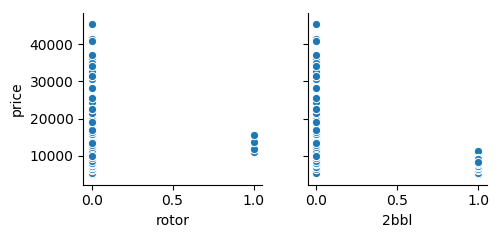

In [423]:
# Lets create pairplots with  the cleaned dataframe against price variable
plt.rcdefaults()
sns.pairplot(carprice, x_vars=['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth'],y_vars='price')           
sns.pairplot(carprice, x_vars=['carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio'],y_vars='price')           
sns.pairplot(carprice, x_vars=['stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg'],y_vars='price')           
sns.pairplot(carprice, x_vars=['highwaympg', 'price', 'audi', 'bmw', 'buick'],y_vars='price')           
sns.pairplot(carprice, x_vars=['chevrolet', 'dodge','honda', 'isuzu', 'jaguar'],y_vars='price')           
sns.pairplot(carprice, x_vars=['mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot'],y_vars='price')           
sns.pairplot(carprice, x_vars=['plymouth', 'porsche', 'renault', 'saab', 'subaru'],y_vars='price')           
sns.pairplot(carprice, x_vars=['toyota','volkswagen', 'volvo', 'gas', 'turbo'],y_vars='price')           
sns.pairplot(carprice, x_vars=['hardtop', 'hatchback', 'sedan','wagon', 'rear'],y_vars='price')
sns.pairplot(carprice, x_vars=['dohcv', 'l', 'ohc', 'ohcf', 'ohcv'],y_vars='price')
sns.pairplot(carprice, x_vars=[ '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],y_vars='price')           
sns.pairplot(carprice, x_vars=['rotor', '2bbl'],y_vars='price')
plt.show()

## Splitting the Data into Training and Testing Sets

In [424]:
from sklearn.model_selection import train_test_split
# Lets divide the data into 70% train & 30%  split ratio
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

MinMax scaling.

In [425]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [426]:
# Apply scaler() to all the columns except 'dummy' variables
num_vars = ['symboling','doornumber','cylindernumber','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,1.0,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0.0,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0.0,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0.0,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,0.2,1.0,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [427]:
# Lets verify whether scaling is correctly done, check the min max values, should be 0 and 1
carprice.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,...,0.073171,0.063415,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,...,0.261054,0.244304,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [428]:
y_train = df_train.pop('price')
X_train = df_train

## Building the model

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [429]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [430]:
# Running RFE with the output number of the variable equal to 50
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [431]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 5),
 ('doornumber', False, 3),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', True, 1),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', True, 1),
 ('highwaympg', True, 1),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', True, 1),
 ('dodge', True, 1),
 ('honda', True, 1),
 ('isuzu', True, 1),
 ('jaguar', True, 1),
 ('mazda', True, 1),
 ('mercury', False, 6),
 ('mitsubishi', True, 1),
 ('nissan', True, 1),
 ('peugeot', True, 1),
 ('plymouth', True, 1),
 ('porsche', True, 1),
 ('renault', True, 1),
 ('saab', True, 1),
 ('subaru', True, 1),
 ('toyota', True, 1),
 ('volkswagen', True, 1),
 ('volvo', True, 1),
 ('gas', True, 1),
 ('turbo', True, 1),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', Tr

In [432]:
# list of variables selected by RFE to build the model
col = X_train.columns[rfe.support_]
col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo',
       'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'rotor', '4bbl', 'idi', 'mpfi', 'spdi'],
      dtype='object')

In [433]:
X_train.columns[~rfe.support_]

Index(['symboling', 'doornumber', 'mercury', 'ohcv', '2bbl', 'mfi', 'spfi'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [434]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [435]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [436]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [437]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     65.11
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.86e-55
Time:                        19:40:20   Log-Likelihood:                 269.60
No. Observations:                 143   AIC:                            -441.2
Df Residuals:                      94   BIC:                            -296.0
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1875      0.092  

In [438]:
# Need to drop "volvo" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     67.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.44e-56
Time:                        19:40:20   Log-Likelihood:                 269.57
No. Observations:                 143   AIC:                            -443.1
Df Residuals:                      95   BIC:                            -300.9
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1846      0.090  

In [439]:
# Need to drop "buick" too as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     69.20
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.12e-56
Time:                        19:40:20   Log-Likelihood:                 269.41
No. Observations:                 143   AIC:                            -444.8
Df Residuals:                      96   BIC:                            -305.6
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1961      0.086  

In [440]:
# Need to drop "citympg" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     71.24
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.53e-57
Time:                        19:40:20   Log-Likelihood:                 269.19
No. Observations:                 143   AIC:                            -446.4
Df Residuals:                      97   BIC:                            -310.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1949      0.086  

In [441]:
# Need to drop "gas" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     71.24
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.53e-57
Time:                        19:40:20   Log-Likelihood:                 269.19
No. Observations:                 143   AIC:                            -446.4
Df Residuals:                      97   BIC:                            -310.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1377      0.083  

In [442]:
# Need to drop "horsepower" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     72.23
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.29e-58
Time:                        19:40:21   Log-Likelihood:                 267.87
No. Observations:                 143   AIC:                            -445.7
Df Residuals:                      98   BIC:                            -312.4
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1495      0.083  

In [443]:
# Need to drop "jaguar" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     73.66
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.33e-59
Time:                        19:40:21   Log-Likelihood:                 266.94
No. Observations:                 143   AIC:                            -445.9
Df Residuals:                      99   BIC:                            -315.5
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1483      0.083  

In [444]:
# Need to drop "dohcv" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     75.49
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.63e-59
Time:                        19:40:21   Log-Likelihood:                 266.31
No. Observations:                 143   AIC:                            -446.6
Df Residuals:                     100   BIC:                            -319.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1151      0.075  

In [445]:
# Need to drop "cylindernumber" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     76.68
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.47e-60
Time:                        19:40:21   Log-Likelihood:                 265.03
No. Observations:                 143   AIC:                            -446.1
Df Residuals:                     101   BIC:                            -321.6
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0675      0.067  

In [446]:
# Need to drop "stroke" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     78.79
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.14e-61
Time:                        19:40:21   Log-Likelihood:                 264.52
No. Observations:                 143   AIC:                            -447.0
Df Residuals:                     102   BIC:                            -325.6
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0536      0.065  

In [447]:
# Need to drop "spdi" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     79.56
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.73e-61
Time:                        19:40:21   Log-Likelihood:                 262.76
No. Observations:                 143   AIC:                            -445.5
Df Residuals:                     103   BIC:                            -327.0
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0454      0.065  

In [448]:
# Need to drop "turbo" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     79.81
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.50e-61
Time:                        19:40:21   Log-Likelihood:                 260.52
No. Observations:                 143   AIC:                            -443.0
Df Residuals:                     104   BIC:                            -327.5
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0824      0.062  

In [449]:
# Need to drop "4bbl" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     80.10
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.35e-62
Time:                        19:40:21   Log-Likelihood:                 258.27
No. Observations:                 143   AIC:                            -440.5
Df Residuals:                     105   BIC:                            -327.9
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0711      0.063  

In [450]:
# Need to drop "porsche" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     80.16
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.64e-62
Time:                        19:40:21   Log-Likelihood:                 255.77
No. Observations:                 143   AIC:                            -437.5
Df Residuals:                     106   BIC:                            -327.9
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0575      0.063  

In [451]:
# Need to drop "wagon" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     81.85
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.44e-62
Time:                        19:40:22   Log-Likelihood:                 254.62
No. Observations:                 143   AIC:                            -437.2
Df Residuals:                     107   BIC:                            -330.6
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0703      0.063  

In [452]:
# Need to drop "hardtop" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     84.02
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.89e-63
Time:                        19:40:22   Log-Likelihood:                 253.78
No. Observations:                 143   AIC:                            -437.6
Df Residuals:                     108   BIC:                            -333.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0651      0.062  

In [453]:
# Need to drop "ohc" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     85.67
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.46e-64
Time:                        19:40:22   Log-Likelihood:                 252.43
No. Observations:                 143   AIC:                            -436.9
Df Residuals:                     109   BIC:                            -336.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0944      0.059  

In [454]:
# Need to drop "highwaympg" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     86.75
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.71e-64
Time:                        19:40:22   Log-Likelihood:                 250.55
No. Observations:                 143   AIC:                            -435.1
Df Residuals:                     110   BIC:                            -337.3
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1524      0.049  

In [455]:
# Need to drop "rotor" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     88.89
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.20e-65
Time:                        19:40:22   Log-Likelihood:                 249.42
No. Observations:                 143   AIC:                            -434.8
Df Residuals:                     111   BIC:                            -340.0
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1525      0.049  

In [456]:
# Need to drop "sedan" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     90.23
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.94e-65
Time:                        19:40:22   Log-Likelihood:                 247.58
No. Observations:                 143   AIC:                            -433.2
Df Residuals:                     112   BIC:                            -341.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1309      0.048  

In [457]:
# Need to drop "saab" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     92.00
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.41e-65
Time:                        19:40:22   Log-Likelihood:                 245.97
No. Observations:                 143   AIC:                            -431.9
Df Residuals:                     113   BIC:                            -343.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1231      0.048  

In [458]:
# Need to drop "wheelbase" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     93.14
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.84e-66
Time:                        19:40:22   Log-Likelihood:                 243.81
No. Observations:                 143   AIC:                            -429.6
Df Residuals:                     114   BIC:                            -343.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1007      0.047  

In [459]:
# All the variables seems to be significant now, lets check for multicolinearity
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,ohcf,inf
24,rear,inf
20,subaru,inf
3,curbweight,79.910000
0,carlength,78.390000
6,compressionratio,73.290000
1,carwidth,56.720000
27,idi,55.200000
4,enginesize,31.190000
5,boreratio,22.470000


In [460]:
# Need to drop "ohcf" as its VIF is > 5 , drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     93.14
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.84e-66
Time:                        19:40:23   Log-Likelihood:                 243.81
No. Observations:                 143   AIC:                            -429.6
Df Residuals:                     114   BIC:                            -343.7
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1007      0.047  

In [461]:
# P-value for all the variables is under control, so lets check the VIF again
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,curbweight,79.91
0,carlength,78.39
6,compressionratio,73.29
1,carwidth,56.72
26,idi,55.20
4,enginesize,31.19
5,boreratio,22.47
17,peugeot,14.62
7,peakrpm,14.59
25,l,14.32


In [462]:
# Need to drop "curbweight" as its VIF is > 5 , drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     77.92
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.45e-61
Time:                        19:40:23   Log-Likelihood:                 228.58
No. Observations:                 143   AIC:                            -401.2
Df Residuals:                     115   BIC:                            -318.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1275      0.052  

In [463]:
# Need to drop "carlength" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     81.29
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.98e-62
Time:                        19:40:23   Log-Likelihood:                 228.30
No. Observations:                 143   AIC:                            -402.6
Df Residuals:                     116   BIC:                            -322.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1242      0.051  

In [464]:
# we dropped few more variables, time to check the VIF again
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,compressionratio,63.01
24,idi,45.84
0,carwidth,41.27
3,boreratio,21.46
2,enginesize,16.70
15,peugeot,14.44
23,l,14.21
5,peakrpm,13.34
1,carheight,10.64
25,mpfi,6.12


In [465]:
# Need to drop "compressionratio" as its VIF is > 5 , drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     68.18
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.12e-58
Time:                        19:40:23   Log-Likelihood:                 213.23
No. Observations:                 143   AIC:                            -374.5
Df Residuals:                     117   BIC:                            -297.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0245      0.047     -0.517      0.6

In [466]:
# Need to drop "mpfi" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     71.14
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.99e-59
Time:                        19:40:23   Log-Likelihood:                 212.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     118   BIC:                            -301.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0267      0.047     -0.567      0.5

In [467]:
# Need to drop "hatchback" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.47e-59
Time:                        19:40:23   Log-Likelihood:                 212.03
No. Observations:                 143   AIC:                            -376.1
Df Residuals:                     119   BIC:                            -304.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0410      0.045     -0.901      0.3

In [468]:
# Need to drop "boreratio" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     76.62
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.56e-60
Time:                        19:40:23   Log-Likelihood:                 210.79
No. Observations:                 143   AIC:                            -375.6
Df Residuals:                     120   BIC:                            -307.4
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0653      0.042     -1.542      0.1

In [469]:
# Need to drop "isuzu" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     79.70
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.18e-60
Time:                        19:40:23   Log-Likelihood:                 209.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     121   BIC:                            -310.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0911      0.038     -2.418      0.0

In [470]:
# Need to drop "carheight" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     81.94
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           6.56e-61
Time:                        19:40:24   Log-Likelihood:                 207.82
No. Observations:                 143   AIC:                            -373.6
Df Residuals:                     122   BIC:                            -311.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1294      0.032     -4.091      0.0

In [471]:
# Time to check the VIF again
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,27.97
11,peugeot,14.02
1,enginesize,13.96
18,l,13.62
2,peakrpm,8.77
19,idi,1.83
7,honda,1.64
5,chevrolet,1.63
8,mazda,1.56
10,nissan,1.40


In [472]:
# Need to drop "carwidth" as its VIF > 5, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight","carwidth"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     56.81
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.30e-51
Time:                        19:40:24   Log-Likelihood:                 179.96
No. Observations:                 143   AIC:                            -319.9
Df Residuals:                     123   BIC:                            -260.7
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0370      0.035     -1.047      0.2

In [473]:
# Need to drop "audi" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight","carwidth","audi"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     60.43
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.68e-52
Time:                        19:40:24   Log-Likelihood:                 179.94
No. Observations:                 143   AIC:                            -321.9
Df Residuals:                     124   BIC:                            -265.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0357      0.035     -1.032      0.3

In [474]:
# Need to drop "l" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight","carwidth","audi","l"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     63.79
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.79e-53
Time:                        19:40:24   Log-Likelihood:                 179.23
No. Observations:                 143   AIC:                            -322.5
Df Residuals:                     125   BIC:                            -269.1
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0322      0.035     -0.933      0.3

In [475]:
# Recheck the VIF
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,peakrpm,5.18
0,enginesize,3.00
5,honda,1.53
16,idi,1.51
6,mazda,1.37
8,nissan,1.31
9,peugeot,1.27
4,dodge,1.25
13,toyota,1.24
7,mitsubishi,1.23


In [476]:
# Need to drop "peakrpm" as its VIF > 5 , drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight","carwidth","audi","l","peakrpm"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     56.72
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.29e-49
Time:                        19:40:24   Log-Likelihood:                 167.42
No. Observations:                 143   AIC:                            -300.8
Df Residuals:                     126   BIC:                            -250.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.026      3.404      0.0

In [477]:
# Need to drop "idi" as its p-value is > 0.05 which makes it insignifanct, drop and rebuild the model
X_train_new = X_train_rfe.drop(["volvo","buick","citympg","gas","horsepower","jaguar","dohcv","cylindernumber","stroke","spdi","turbo","4bbl","porsche","wagon","hardtop","ohc","highwaympg","rotor","sedan","saab","wheelbase","ohcf","curbweight","carlength","compressionratio","mpfi","hatchback","boreratio","isuzu","carheight","carwidth","audi","l","peakrpm","idi"], axis = 1)
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     59.36
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.13e-50
Time:                        19:40:24   Log-Likelihood:                 165.73
No. Observations:                 143   AIC:                            -299.5
Df Residuals:                     127   BIC:                            -252.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0891      0.026      3.464      0.0

In [478]:
# VIF test again
X_train_new = X_train_new.drop(['const'], axis=1)
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginesize,1.86
1,bmw,1.16
12,toyota,1.15
7,nissan,1.12
8,peugeot,1.11
6,mitsubishi,1.06
11,subaru,1.05
5,mazda,1.04
13,volkswagen,1.04
14,rear,1.04


Text(0.5,0,'Errors')

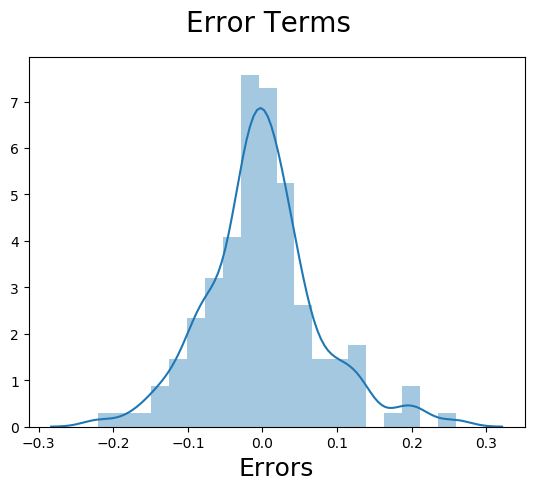

In [479]:
# All looks good now, VIF and p values for all the variables are under control, lets check for the Erro terms
y_train_price = lm.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [480]:
# Error terms seems to be good, following a normal distribution and the mean is set to 0

## Making Predictions

#### Applying the scaling on the test sets

In [481]:
# Apply scaler() to test dataframe
num_vars = ['symboling','doornumber','cylindernumber','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','citympg','highwaympg','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [482]:
y_test = df_test.pop('price')
X_test = df_test

In [483]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [484]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0,0.5,'y_pred')

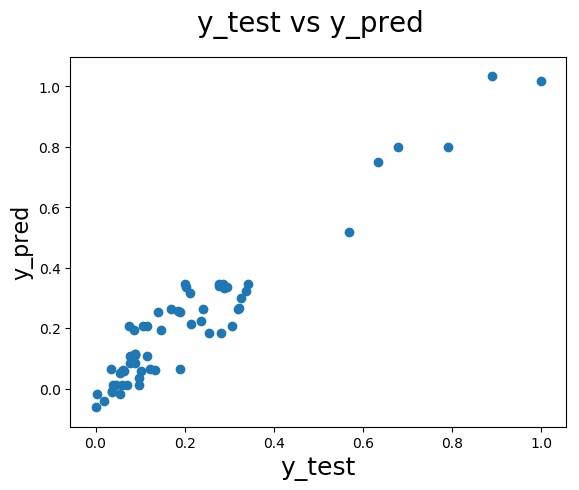

In [485]:
# Plotting y_test and y_pred to understand the spread, results looks good
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [486]:
# r square on the test data frame, looks good
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004764301860512522
r_square_value : 0.8911414752992879


Text(0,0.5,'Views')

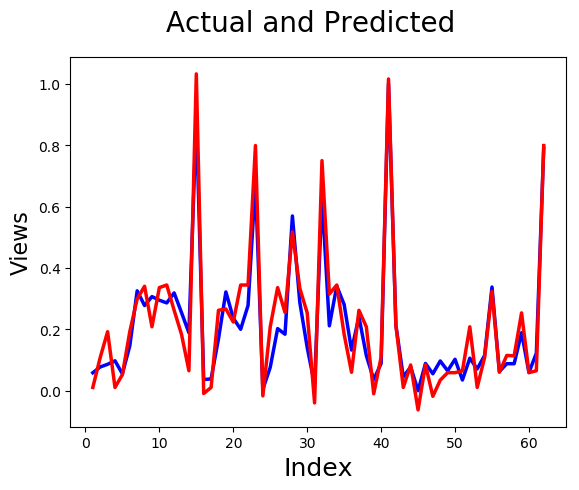

In [487]:
#Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0,0.5,'Views_show-Predicted_views')

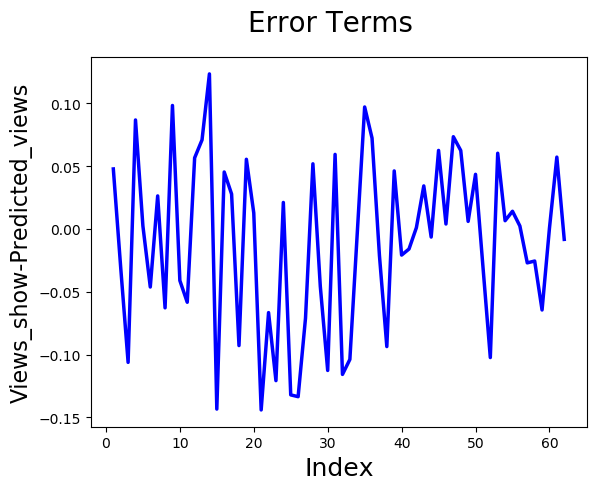

In [488]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label